In [1]:
# Transformação linear pt2
import numpy as np

In [2]:
# definindo o vetor original
v = np.array([[1], [1]])
v

array([[1],
       [1]])

In [3]:
# a) rotação
theta = np.pi / 4  # angulo de rotação em radianos
R = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])
rotated_v = np.dot(R, v)

In [4]:
# b) escalonamento
S = np.array([[2, 0],
             [0, 0.5]])
scaled_v = np.dot(S, v)

In [5]:
# c) reflexão
F = np.array([[1, 0],
              [0, -1]])
reflected_v = np.dot(F, v)

In [6]:
# d) cisalhamento
H = np.array([[1, 0.5],
              [0, 1]])
sheared_v = np.dot(H, v)

In [7]:
# exibindo os resultados
print('a) rotação')
print(rotated_v)
print('\nb) escalonamento')
print(scaled_v)
print('\nc) reflexão')
print(reflected_v)
print('\nd) cisalhamento')
print(sheared_v)

a) rotação
[[0.        ]
 [1.41421356]]

b) escalonamento
[[2. ]
 [0.5]]

c) reflexão
[[ 1]
 [-1]]

d) cisalhamento
[[1.5]
 [1. ]]


In [8]:
import matplotlib.pyplot as plt

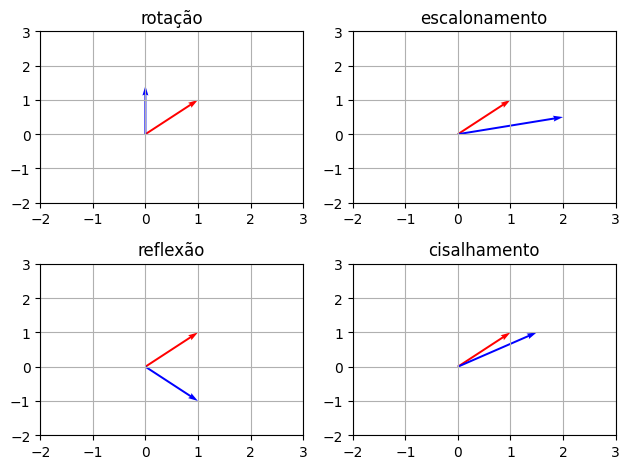

In [18]:
# definindo o vetor original
v = np.array([1, 1])

transformations = [
    ("rotação", np.array([[np.cos(np.pi/4), -np.sin(np.pi/4)],
                          [np.sin(np.pi/4), np.cos(np.pi/4)]])),
    ("escalonamento", np.array([[2, 0],
                               [0, 0.5]])),
    ("reflexão", np.array([[1, 0],
                           [0, -1]])),
    ("cisalhamento", np.array([[1, 0.5],
                               [0, 1]]))
]

for i, (name, T) in enumerate(transformations, start=1):
    plt.subplot(2, 2, i)
    plt.title(name)
    transformed_v = np.dot(T, v)
    plt.quiver([0, 0], [0, 0], [v[0], transformed_v[0]], [v[1], transformed_v[1]], angles='xy', scale_units='xy', scale=1, color=['r', 'b'])
    plt.xlim(-2, 3)
    plt.ylim(-2, 3)
    plt.grid(True)

plt.tight_layout()
plt.show()

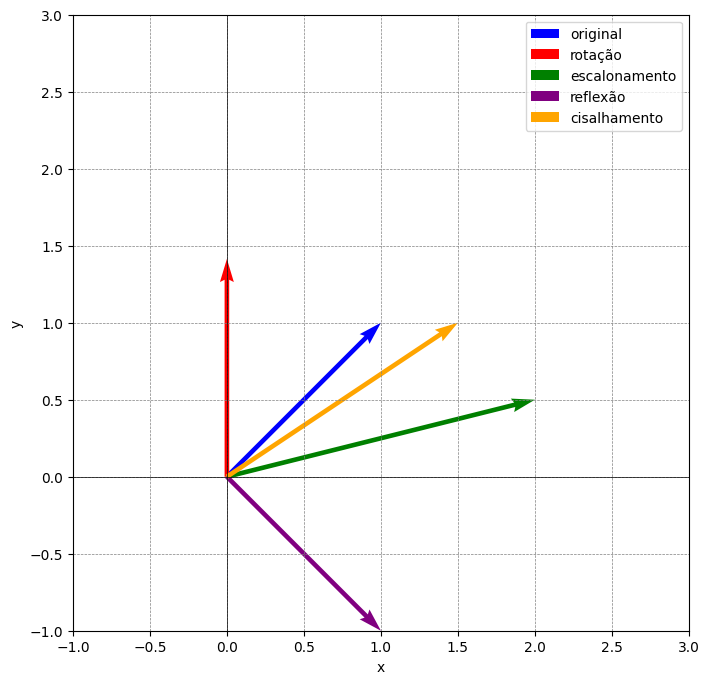

In [19]:
# vetor de exemplo 
vetor = np.array([1, 1])

# rotação
theta = np.pi/4  # 45 graus
rotacao = np.array([[np.cos(theta), -np.sin(theta)],
                    [np.sin(theta), np.cos(theta)]])
vetor_rotacionado = np.dot(rotacao, vetor)


# escalonamento
escalonamento = np.array([[2, 0],
                        [0, 0.5]])
vetor_escalado = np.dot(escalonamento, vetor)

# reflexão
reflexao_x = np.array([[1, 0],
                        [0, -1]])
vetor_refletido_x = np.dot(reflexao_x, vetor)

# cisalhamento
cisalhamento_horizontal = np.array([[1, 0.5],
                                    [0, 1]])
vetor_cisalhado = np.dot(cisalhamento_horizontal, vetor)

# plotando os vetores
plt.figure(figsize=(10, 8))

# original
plt.quiver(0, 0, vetor[0], vetor[1], angles='xy', scale_units='xy', scale=1, color='b', label='original')

# rotação
plt.quiver(0, 0, vetor_rotacionado[0], vetor_rotacionado[1], angles='xy', scale_units='xy', scale=1, color='r', label='rotação')

# escalonamento
plt.quiver(0, 0, vetor_escalado[0], vetor_escalado[1], angles='xy', scale_units='xy', scale=1, color='g', label='escalonamento')

# reflexão
plt.quiver(0, 0, vetor_refletido_x[0], vetor_refletido_x[1], angles='xy', scale_units='xy', scale=1, color='purple', label='reflexão')

# cisalhamento
plt.quiver(0, 0, vetor_cisalhado[0], vetor_cisalhado[1], angles='xy', scale_units='xy', scale=1, color='orange', label='cisalhamento')

plt.xlim(-1, 3)
plt.ylim(-1, 3)
plt.xlabel('x')
plt.ylabel('y')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.show()

In [20]:
from matplotlib.patches import Rectangle
from matplotlib.transforms import Affine2D

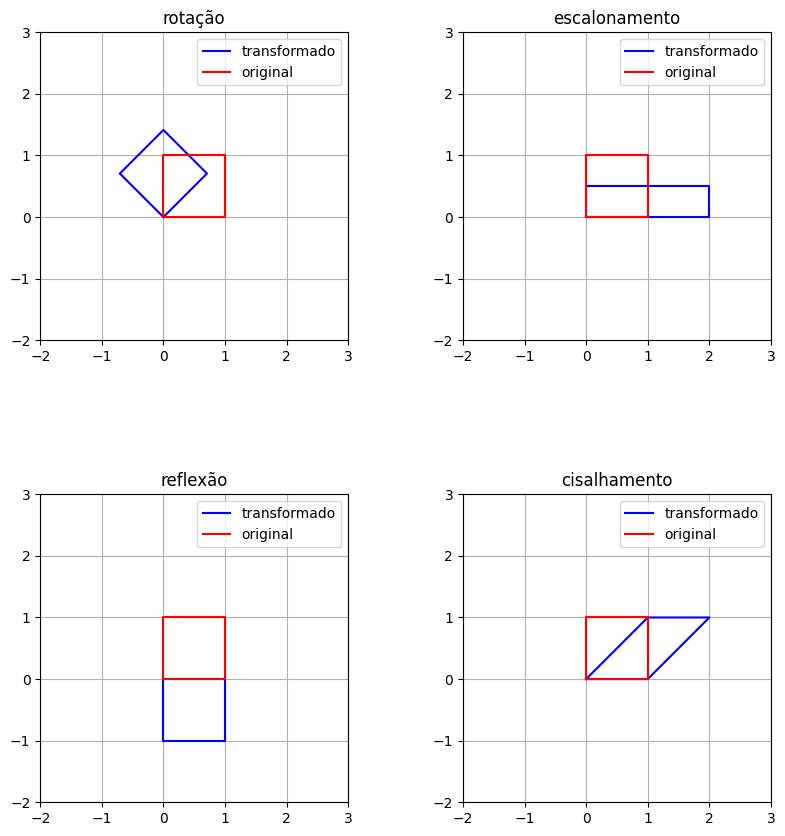

In [22]:
# definindo os coordenadas do quadrado original
square = np.array([[0, 1, 1, 0, 0],
                   [0, 0, 1, 1, 0]])

# função para plotar o quadrado
def plot_square(ax, square, color, label):
    ax.plot(square[0], square[1], color=color, label=label)

# criando a figura
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)
transformations = [
    ("rotação", Affine2D().rotate_deg(45)),
    ("escalonamento", Affine2D().scale(2, 0.5)),
    ("reflexão", Affine2D().scale(1, -1)),
    ("cisalhamento", Affine2D().skew_deg(45, 0))
]

# aplicando as transformações e plotando o quadrado
for i, (name, transformation) in enumerate(transformations, start=1):
    ax = axs.flatten()[i-1]
    transformed_square = transformation.transform(square.T).T
    plot_square(ax, transformed_square, color='blue', label='transformado')
    plot_square(ax, square, color='red', label='original')
    ax.set_title(name)
    ax.set_xlim(-2, 3)
    ax.set_ylim(-2, 3)
    ax.set_aspect('equal')
    ax.grid(True)
    ax.legend()
plt.show()


In [23]:
from mpl_toolkits.mplot3d import Axes3D

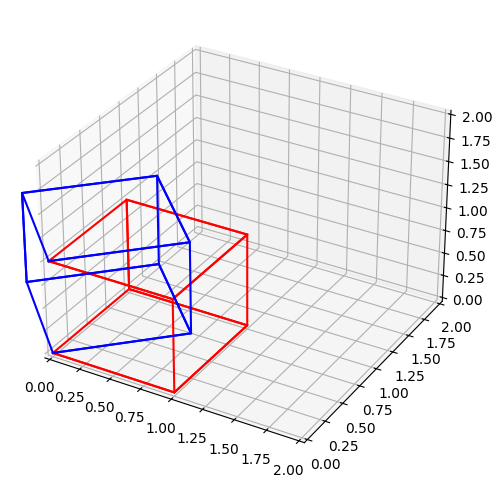

In [26]:
# função para plotar um cubo
def plot_cube(ax, vertices, color):
    #definindo as faces do cubo
    faces = [[vertices[j] for j in [0, 1, 2, 3]],
             [vertices[j] for j in [4, 5, 6, 7]],
             [vertices[j] for j in [0, 1, 5, 4]],
             [vertices[j] for j in [2, 3, 7, 6]],
             [vertices[j] for j in [1, 2, 6, 5]],
             [vertices[j] for j in [0, 3, 7, 4]]]
    # plotando as faces do cubo
    for face in faces:
        x = [v[0] for v in face]
        y = [v[1] for v in face]
        z = [v[2] for v in face]
        ax.plot(x, y, z, color=color)

# criando a figura e o subplot 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# definindo as vertices do cubo original
vertices_original = np.array([[0, 0, 0],
                              [1, 0, 0],
                              [1, 1, 0],
                              [0, 1, 0],
                              [0, 0, 1],
                              [1, 0, 1],
                              [1, 1, 1],
                              [0, 1, 1]])

# plotando o cubo original
plot_cube(ax, vertices_original, color='red')

# aplicando um rotação ao cubo
transformation_matrix = np.array([[np.cos(np.pi/4), -np.sin(np.pi/4), 0],
                                  [np.sin(np.pi/4), np.cos(np.pi/4), 0],
                                  [0, 0, 1]])
vertices_rotated = np.dot(transformation_matrix, vertices_original.T).T

# plotando o cubo rotacionando
plot_cube(ax, vertices_rotated, color='blue')

# ajustando os limites do grafico
ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_zlim(0, 2)

plt.show()